In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
# import plotly.graph_objects as go

In [80]:
df = pd.read_pickle('data/processed.pickle')
df.head()

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[feedback:test_output, interaction:unknown, to...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",[OOP]
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[tool:javassess, language:java, interaction:un...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[skill:code_quality, evaluation:none, interact...",[static],"[readability, maintainability]","[maintainability_static, readability_static]",[description],[OOP]
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[feedback:test_output, data:internal_assignmen...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Unknown]
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[feedback:test_output, data:internal_assignmen...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]


### Colors

In [81]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)

color_map_year = {2017: grey,
                  2018: darkgreen,
                  2019: blue,
                  2020: yellow,
                  2021: teal}

# Meta-Data
### Years Published

In [82]:
count_years = df.year_published.value_counts().reset_index()
count_years.head()

,year_published,count
0,2020,28
1,2021,27
2,2019,25
3,2018,21
4,2017,20


In [83]:
count_years['count'].sum()

121

/Users/marcus/workspace/Programming/JavaDoc_Code_Similarity/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


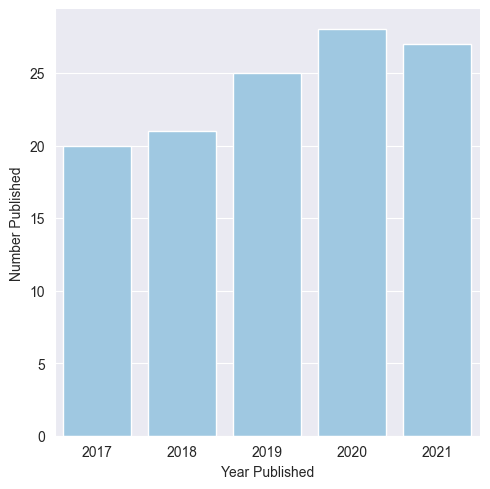

In [84]:
years_plt = sns.catplot(count_years, kind='bar', x='year_published', y='count', color=blue)
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

# List formatter

In [85]:
def list_formatter(items):
    if len(items) == 1:
        return ("Only " + items[0]).title()
    else:
        return (', '.join(items[0:len(items) - 1]) + " and " + items[len(items) - 1]).title()

## Paper Types

In [86]:
paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types.paper_type = paper_types.paper_type.apply(lambda pt: list_formatter(pt))
paper_types

,paper_type,no_type,proportion
0,Description And Evaluation,82,67.768595
1,Only Evaluation,17,14.049587
2,Only Description,11,9.090909
3,Only Experience,11,9.090909


In [87]:
paper_types.no_type.sum()

121

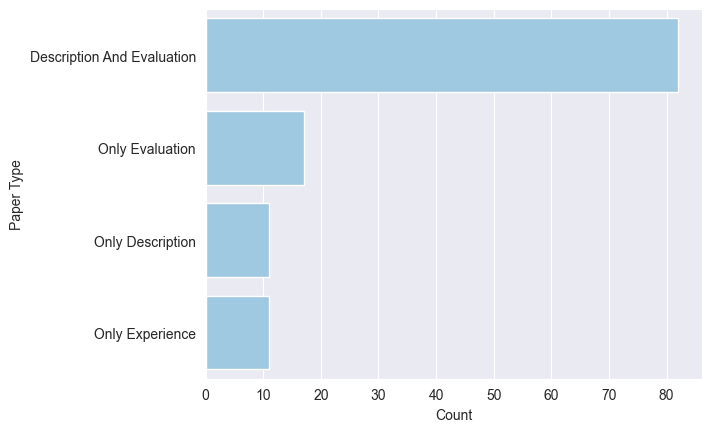

In [88]:
ax_type = sns.barplot(paper_types, y='paper_type', x='no_type', color=blue)
ax_type.set(xlabel = 'Count', ylabel='Paper Type')
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [89]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,99,81.818182
1,semi_automatic,17,14.049587
2,unclear,5,4.132231


In [90]:
auto.number.sum()

121

In [91]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
116,Automated data-driven hints for computer progr...,[approach:fully_automated]
117,Learning and teaching numerical methods with a...,[approach:fully_automated]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
119,An AI system for coaching novice programmers,[approach:fully_automated]


In [92]:
auto.degree_of_automation = auto.degree_of_automation.str.replace('_', ' ').str.title()
auto

,degree_of_automation,number,proportion
0,Fully Automated,99,81.818182
1,Semi Automatic,17,14.049587
2,Unclear,5,4.132231


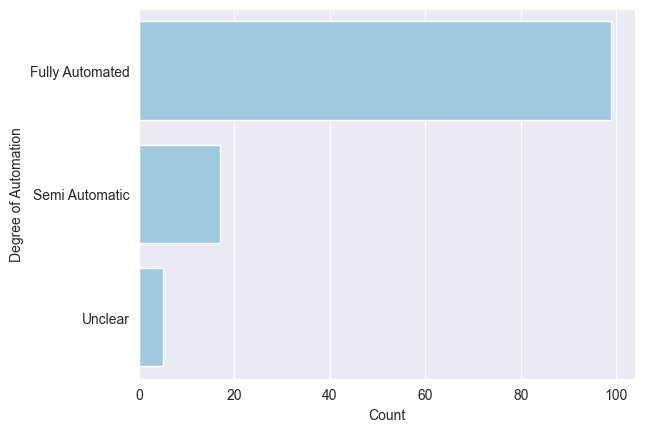

In [93]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='number', color=blue)
ax_doa.set(xlabel = 'Count', ylabel='Degree of Automation')
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [94]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,50,41.322314
1,multiple,50,41.322314
2,single,18,14.876033
3,none,3,2.479339


In [95]:
inter.number.sum()

121

In [96]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
116,Automated data-driven hints for computer progr...,[interaction:multiple]
117,Learning and teaching numerical methods with a...,[interaction:multiple]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
119,An AI system for coaching novice programmers,[interaction:unknown]


In [97]:
inter.interaction = inter.interaction.str.title()
inter

,interaction,number,proportion
0,Unknown,50,41.322314
1,Multiple,50,41.322314
2,Single,18,14.876033
3,None,3,2.479339


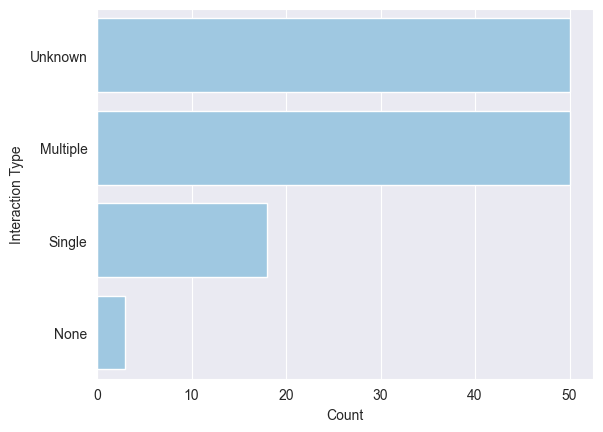

In [98]:
ax_int = sns.barplot(inter, y='interaction', x='number', color=blue)
ax_int.set(xlabel = 'Count', ylabel='Interaction Type')
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Skills

In [99]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']

skills['proportion'] = (skills.number / skills.number.sum()) * 100
skills.skills = skills.skills.apply(lambda pt: list_formatter(pt))
skills.to_csv('data/skills.csv')

In [100]:
skills.number.sum()

121

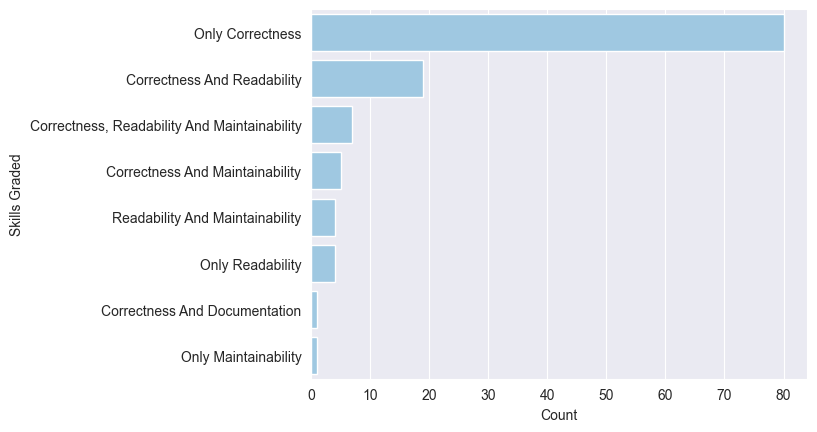

In [101]:
ax_skill = sns.barplot(skills, y='skills', x='number', color=blue)
ax_skill.set(xlabel = 'Count', ylabel='Skills Graded')
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Skill-Category Complete Mapping
## 1D Plots

In [102]:
def skill_cat_formatter(sk):
    sk = [s.split('_') for s in sk]

    if len(sk) == 1:
        return " using ".join(sk[0]).title()
    elif len(sk) == 2:
        if sk[0][0] == sk[1][0]:
            return (sk[0][0] + ' using ' + sk[0][1] + ' and ' + sk[1][1]).title()
        if sk[0][1] == sk[1][1]:
            return (sk[0][0] + ' and ' + sk[1][0] + ' using ' + sk[0][1]).title()
        else:
            return (" and ".join([' using '.join(s) for s in sk])).title()
    else:
        return sk

In [103]:
skill_cat_count = df.skill_cat.value_counts().reset_index().copy()
skill_cat_count.columns = ["skill_cat", 'number']
skill_cat_count['proportion'] = (skill_cat_count.number / skill_cat_count.number.sum()) * 100
skill_cat_count.skill_cat = skill_cat_count.skill_cat.apply(lambda sk: skill_cat_formatter(sk))
skill_cat_count.skill_cat = skill_cat_count.skill_cat.str.replace('Ml', 'ML')
skill_cat_count

,skill_cat,number,proportion
0,Correctness Using Dynamic,36,29.752066
1,Correctness Using Dynamic And Static,25,20.661157
2,Correctness Using Static,17,14.049587
3,Correctness Using Dynamic And Readability Usin...,15,12.396694
4,Maintainability And Readability Using Static,4,3.305785
5,Readability Using Static,4,3.305785
6,Correctness Using Dynamic And Maintainability ...,3,2.479339
7,Correctness Using ML And Static,3,2.479339
8,Correctness And Maintainability Using Static,2,1.652893
9,Correctness And Readability Using Static,2,1.652893


In [104]:
skill_cat_count.number.sum()

121

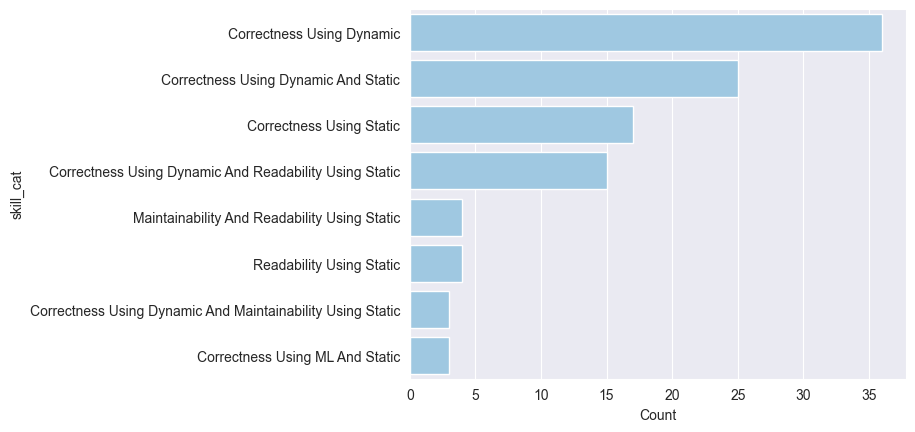

In [105]:
ax_skill_cat = sns.barplot(skill_cat_count[skill_cat_count.number > 2], y='skill_cat', x='number', color=blue)
ax_skill_cat.set(xlabel = 'Count')
plt.savefig('plots/skill_cat.pdf', bbox_inches='tight')

In [106]:
skill_cat_exp = df.explode('skill_cat').skill_cat.value_counts().reset_index()
skill_cat_exp.columns = ["skill_cat", 'number']
skill_cat_exp['proportion'] = (skill_cat_exp.number / skill_cat_exp.number.sum()) * 100
skill_cat_exp.skill_cat = skill_cat_exp.skill_cat.str.replace('_', ' ').str.title()
skill_cat_exp.head()

,skill_cat,number,proportion
0,Correctness Dynamic,82,44.565217
1,Correctness Static,51,27.717391
2,Readability Static,28,15.217391
3,Maintainability Static,11,5.978261
4,Correctness Ml,8,4.347826


In [107]:
skill_cat_exp.number.sum()

184

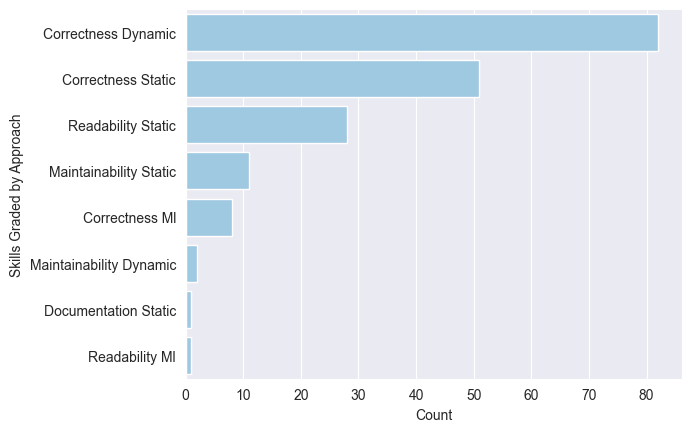

In [108]:
ax_skill_cat_exp = sns.barplot(skill_cat_exp, y='skill_cat', x='number', color=blue)
ax_skill_cat_exp.set(xlabel = 'Count', ylabel='Skills Graded by Approach')
plt.savefig('plots/skill_cat_exp.pdf', bbox_inches='tight')

## Skill Category 2D plots

In [109]:
skill_cat_2d = df[['title', 'skill_cat']].explode('skill_cat').copy()
skill_cat_2d.head()

,title,skill_cat
0,An experience of automated assessment in a lar...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_static
2,A tool for evaluating computer programs from s...,maintainability_static
2,A tool for evaluating computer programs from s...,readability_static


In [110]:
split_df = skill_cat_2d.skill_cat.str.split('_', expand=True)
skill_cat_2d_split = pd.concat([skill_cat_2d, split_df],axis=1).drop(columns='skill_cat')
skill_cat_2d_split.columns = ['title', 'skill', 'category']
skill_cat_2d_split.head()

,title,skill,category
0,An experience of automated assessment in a lar...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,static
2,A tool for evaluating computer programs from s...,maintainability,static
2,A tool for evaluating computer programs from s...,readability,static


In [111]:
skill_cat_2d_grp = skill_cat_2d_split.groupby(['skill', 'category']).count().reset_index()
skill_cat_2d_grp.columns = ['skill', 'category', 'number']
skill_cat_2d_grp = skill_cat_2d_grp.sort_values('number', ascending=False)
skill_cat_2d_grp.head()
skill_cat_2d_grp.to_csv('data/skill_cat.csv')

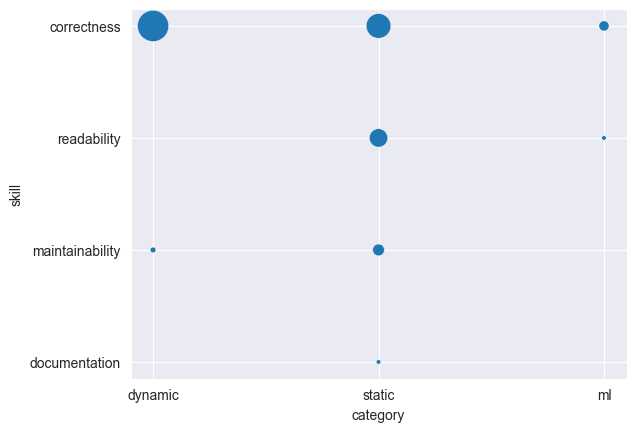

In [112]:
sns.scatterplot(skill_cat_2d_grp, y='skill', x='category', size='number', sizes=(10, 500), legend=False)
plt.savefig('plots/skill_cat_2d_bubble.pdf', bbox_inches='tight')

### Bipartie

In [113]:
skill_cat_bp = skill_cat_2d_grp.copy()

skill_cat_bp.skill = skill_cat_bp.skill.map(lambda x: x[:4])
skill_cat_bp.category = skill_cat_bp.category.map(lambda x: x[:4])

skill_cat_bp['proportion'] = (skill_cat_bp.number / skill_cat_bp.number.sum()) * 50

skill_cat_bp

,skill,category,number,proportion
0,corr,dyna,82,22.282609
2,corr,stat,51,13.858696
7,read,stat,28,7.608696
5,main,stat,11,2.989130
1,corr,ml,8,2.173913
4,main,dyna,2,0.543478
3,docu,stat,1,0.271739
6,read,ml,1,0.271739


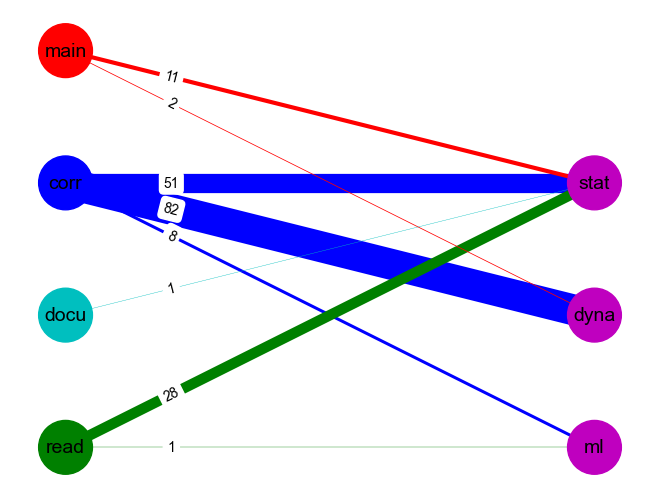

In [114]:
# Adapted from documentation
color_map_skill = {'corr':'b', 'read':'g', 'main':'r', 'docu':'c'}


B = nx.Graph()
B.add_nodes_from(['corr', 'read', 'main', 'docu'], bipartite=0)
B.add_nodes_from(['dyna', 'stat', 'ml'], bipartite=1)

bp_raw = list(skill_cat_bp.itertuples(index=False,name=None))

for e in bp_raw:
    B.add_edge(e[0], e[1], count=e[2], width=e[3], color=color_map_skill[e[0]])


# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nodes = B.nodes()
node_colors = [color_map_skill[n] if n in color_map_skill else 'm' for n in nodes]

edges = B.edges()
edge_colors = [B[u][v]['color'] for u, v in edges]
weights = [B[u][v]['width'] for u, v in edges]

nx.draw(B, pos, edge_color=edge_colors, width=weights, node_size=1500, node_color=node_colors)

# node labels
nx.draw_networkx_labels(B, pos, font_size=14, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(B, "count")

nx.draw_networkx_edge_labels(B, pos, edge_labels, label_pos=0.8)
plt.savefig('plots/skill_cat_bipartie.png')

### Sankey Diagram

In [115]:
skill_cat_sankey = skill_cat_2d_grp.copy()

skill_cat_sankey.sort_values(by=['skill', 'category']).reset_index().drop(columns=['index'])

,skill,category,number
0,correctness,dynamic,82
1,correctness,ml,8
2,correctness,static,51
3,documentation,static,1
4,maintainability,dynamic,2
5,maintainability,static,11
6,readability,ml,1
7,readability,static,28


In [116]:
# CORRECTNESS_COLOR = '#E6798A'
# MAINTAINABILITY_COLOR = '#59A1E6'
# READABILITY_COLOR = '#6AAF46'
# DOCUMENTATION_COLOR = '#B59945'
#
# fig = go.Figure(data=[go.Sankey(
#     node = dict(
#         pad = 15,
#         thickness = 20,
#         line = dict(color="black", width = 0.5),
#         label = skill_cat_sankey.skill.unique().tolist() + skill_cat_sankey.category.unique().tolist(),
#         color = [CORRECTNESS_COLOR, READABILITY_COLOR, MAINTAINABILITY_COLOR, DOCUMENTATION_COLOR, 'grey', 'grey', 'grey']
#     ),
#     link = dict(
#         source = [0, 0, 0, 1, 2, 2, 3, 3],
#         target = [4, 5, 6, 6, 4, 6, 5, 6],
#         value = skill_cat_sankey.number.tolist(),
#         color = [CORRECTNESS_COLOR, CORRECTNESS_COLOR, CORRECTNESS_COLOR, READABILITY_COLOR, MAINTAINABILITY_COLOR, MAINTAINABILITY_COLOR, DOCUMENTATION_COLOR, DOCUMENTATION_COLOR]
#     )
# )])
#
# fig.update_layout(
#     hovermode = 'x',
#     font=dict(size = 10, color = 'black'),
#     plot_bgcolor='white',
#     paper_bgcolor='white'
# )
#
# fig.show()
# fig.write_image("plots/skill_cat_sankey.pdf")

## Skill Category Over Time
### Skill Category Combined

In [117]:
skill_cat_time = df[['skill_cat', 'year_published']].copy()
skill_cat_time = skill_cat_time.explode('skill_cat')
skill_cat_time.head()

,skill_cat,year_published
0,correctness_dynamic,2021
1,correctness_dynamic,2021
1,correctness_static,2021
2,maintainability_static,2021
2,readability_static,2021


In [118]:
skill_cat_time_grp = skill_cat_time.copy()
skill_cat_time_grp.skill_cat = skill_cat_time_grp.skill_cat.str.replace('_', ' ').str.title()
skill_cat_time_grp.year_published = skill_cat_time_grp.year_published.astype(str)
skill_cat_time_grp['cumulative_sum'] = 0
skill_cat_time_grp = skill_cat_time_grp.groupby(['skill_cat', 'year_published']).count().groupby(level=0).cumsum().reset_index()

skill_cat_time_grp.head()

,skill_cat,year_published,cumulative_sum
0,Correctness Dynamic,2017,10
1,Correctness Dynamic,2018,24
2,Correctness Dynamic,2019,38
3,Correctness Dynamic,2020,63
4,Correctness Dynamic,2021,82


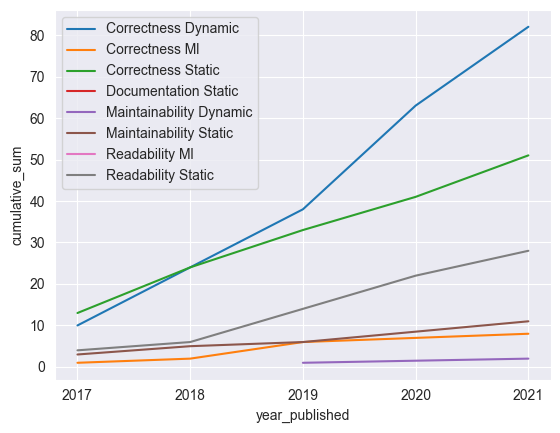

In [119]:
sns.lineplot(skill_cat_time_grp, x='year_published', y='cumulative_sum', hue='skill_cat')
plt.legend(loc='upper left')
plt.savefig('plots/skill_cat_time.pdf')

### Skill Category Split

In [120]:
skill_cat_time_s = df[['skill_cat', 'year_published']].copy()
skill_cat_time_s = skill_cat_time_s.explode('skill_cat')
split = skill_cat_time_s.skill_cat.str.split('_', expand=True)
skill_cat_time_s = pd.concat([skill_cat_time_s, split], axis=1)
skill_cat_time_s = skill_cat_time_s.drop(columns='skill_cat')
skill_cat_time_s.columns = ['year_published', 'skill', 'category']
skill_cat_time_s.head()

,year_published,skill,category
0,2021,correctness,dynamic
1,2021,correctness,dynamic
1,2021,correctness,static
2,2021,maintainability,static
2,2021,readability,static


In [121]:
skill_cat_time_s['total'] = 0
skill_cat_s_g = skill_cat_time_s.groupby(['year_published', 'skill', 'category']).count().reset_index().sort_values(['skill', 'category'])
skill_cat_s_g.category = skill_cat_s_g.category.replace('ml', 'machine learning')
skill_cat_s_g

,year_published,skill,category,total
0,2017,correctness,dynamic,10
6,2018,correctness,dynamic,14
11,2019,correctness,dynamic,14
18,2020,correctness,dynamic,25
22,2021,correctness,dynamic,19
1,2017,correctness,machine learning,1
7,2018,correctness,machine learning,1
12,2019,correctness,machine learning,4
19,2020,correctness,machine learning,1
23,2021,correctness,machine learning,1


In [122]:

hatch_map_year = {2017:'//', 2018:'+', 2019:'\\', 2020:'-', 2021:'o'}
MARKER_SCALE = 100

def plot_years(sub_ax, skill, cat):

    temp_df = skill_cat_s_g[skill_cat_s_g.skill == skill]
    temp_df = temp_df[temp_df.category == cat]

    for index, row in temp_df.iterrows():
        year = [row.year_published for i in range(row.total)]
        y_pos = [1 for i in range(row.total)]

        sub_ax.scatter(year, y_pos, c=color_map_year[row.year_published], hatch=(3 * hatch_map_year[row.year_published]), label=row.year_published, s=(row.total * MARKER_SCALE))
        sub_ax.set(xlim=[2016, 2022])



/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_66893/4103642233.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  sub_ax.scatter(year, y_pos, c=color_map_year[row.year_published], hatch=(3 * hatch_map_year[row.year_published]), label=row.year_published, s=(row.total * MARKER_SCALE))


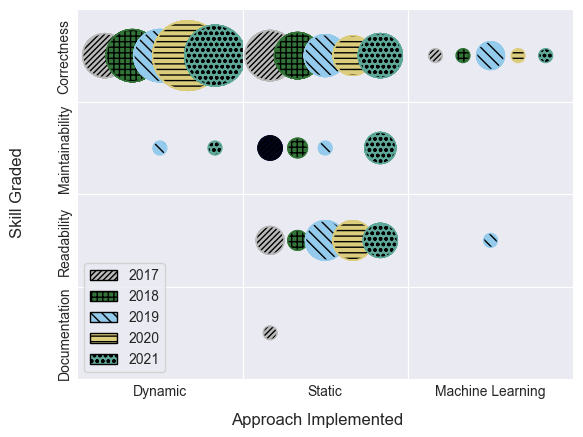

In [123]:

import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure()
grid = fig.add_gridspec(4, 3, wspace=0, hspace=0)

axs = grid.subplots()

skills = ['correctness', 'maintainability', 'readability', 'documentation']
category = ['dynamic', 'static', 'machine learning']

for (s, c), ax in np.ndenumerate(axs):
    plot_years(ax, skills[s], category[c])
    ax.set(xticks=[], yticks=[], xlabel=category[c].title())

    if c == 0:
        ax.set(ylabel=skills[s].title())

    if c == 0 and s == 3:
        patches = [mpatches.Patch(label=year, facecolor=color_map_year[year], edgecolor='black', hatch=(3 * hatch))
                   for year, hatch in hatch_map_year.items()]
        ax.legend(handles=patches, loc='lower left')

fig.supxlabel('Approach Implemented')
fig.supylabel('Skill Graded')
plt.savefig('plots/skill_cat_time_sep.pdf')

# Grading/Feedback Techniques

In [124]:
tech_df = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech_df.columns = ["technique", 'number']
tech_df['proportion'] = (tech_df.number / tech_df.number.sum()) * 100
tech_df

,technique,number,proportion
0,unit_testing,81,29.779412
1,matching_rules,49,18.014706
2,static_analysis,30,11.029412
3,style_check,17,6.250000
4,program_repair,15,5.514706
5,machine_learning,10,3.676471
6,ci_cd,7,2.573529
7,code_metrics,7,2.573529
8,output_matching,7,2.573529
9,trace_examination,5,1.838235


In [125]:
def add_cats(tech):
    if tech in ['unit_testing', 'property_based_testing', 'ci', 'output_matching']:
        return 'dynamic'
    if tech in ['pattern_matching', 'static_analysis', 'code_metrics', 'cluster',
                'style_check', 'program_repair', 'rule_based', 'dsl_rules', 'model_solution_req',
                'model_solution_closeness', 'code_repair_for_feedback', 'matching_rules']:
        return 'static'
    if tech in ['machine_learning', 'misc']:
        return 'other'

In [126]:
tech_df['category'] = tech_df.technique.apply(lambda tech: add_cats(tech))
tech_df

,technique,number,proportion,category
0,unit_testing,81,29.779412,dynamic
1,matching_rules,49,18.014706,static
2,static_analysis,30,11.029412,static
3,style_check,17,6.250000,static
4,program_repair,15,5.514706,static
5,machine_learning,10,3.676471,other
6,ci_cd,7,2.573529,None
7,code_metrics,7,2.573529,static
8,output_matching,7,2.573529,dynamic
9,trace_examination,5,1.838235,None


In [127]:
tech_df.category.isna().sum()

27

In [128]:
tech_df[tech_df.category.isna()]

,technique,number,proportion,category
6,ci_cd,7,2.573529,None
9,trace_examination,5,1.838235,None
10,pre_defined_questions,5,1.838235,None
11,dynamic_analysis,4,1.470588,None
12,mutation_testing,3,1.102941,None
14,language_stuctures,3,1.102941,None
15,clustering,3,1.102941,None
16,graph_analysis,2,0.735294,None
17,knowledge_base,2,0.735294,None
18,test_case_generation,2,0.735294,None


In [129]:
tech_df = tech_df.sort_values(by=['category', 'proportion'], ascending=[False, True])
tech_df.technique = tech_df.technique.str.replace('_', ' ').str.title()
tech_df.category = tech_df.category.str.title()
tech_df.category = tech_df.category.str.replace('Other', 'ML')
tech_df = tech_df[tech_df.technique != 'Static Analysis']
tech_df.head()

,technique,number,proportion,category
7,Code Metrics,7,2.573529,Static
4,Program Repair,15,5.514706,Static
3,Style Check,17,6.250000,Static
1,Matching Rules,49,18.014706,Static
5,Machine Learning,10,3.676471,ML


/Users/marcus/workspace/Programming/JavaDoc_Code_Similarity/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


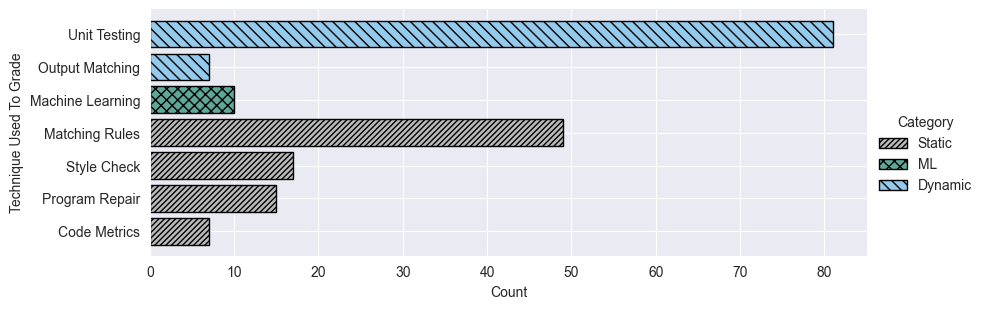

In [148]:
ax_tech_cat = sns.FacetGrid(tech_df[tech_df.number > 5], hue='category', aspect=3)
ax_tech_cat.map_dataframe(plt.barh, y='technique', width='number')

ax_tech_cat.set(xlabel='Count', ylabel='Technique Used To Grade')

hatches = ['//', 'x', '\\']
colors = [grey, teal, blue]
styles = zip(hatches, colors)

for style, these_bars in zip(styles, ax_tech_cat.ax.containers):
    for this_bar in these_bars:
        this_bar.set_hatch(3 * style[0])
        this_bar.set_facecolor(style[1])
        this_bar.set_edgecolor('black')


ax_tech_cat.add_legend(title='Category')
plt.savefig('plots/technique_cat.pdf')

# Language

In [131]:
t = df.copy()
t.lang_family = t.lang_family.astype(str)
t[t.lang_family == "['Agnostic']"]

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
25,rayyan-354359301,Auto-marking system: A support tool for learni...,"Bakar M.A., Esa M.I., Jailani N., Mukhtar M., ...",Computer programming requires skills in design...,2018,"[tool:none, skill:correctness, technique:unit_...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",['Agnostic']
48,rayyan-354359326,Automated Assessment of Complex Programming Ta...,R. Conejo and B. Barros and M. F. Bertoa,This paper presents an innovative method to ta...,2018,"[feedback:test_output, data:internal_assignmen...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",['Agnostic']
53,rayyan-354359332,PAAA: An Implementation of Programming Assignm...,"Tianyi S,Yulin K,Yihong H,Yujuan Q","Now we are in the information age, and distanc...",2019,"[data:internal_assignments, skill:correctness,...",[static],[correctness],[correctness_static],"[description, evaluation]",['Agnostic']
59,rayyan-354359339,"An Open-Source, API-Based Framework for Assess...","Sharp C,van Assema J,Yu B,Zidane K,Malan DJ","We present check50, an open-source, extensible...",2020,"[skill:code_quality, feedback:test_output, dat...","[dynamic, static]","[correctness, readability]",[correctness_dynamic],"[description, evaluation]",['Agnostic']
87,rayyan-354359372,Building a Comprehensive Automated Programming...,I. Mekterović and L. Brkić and B. Milašinović ...,Automated Programming Assessment Systems (APAS...,2020,"[feedback:test_output, tool:none, skill:correc...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",['Agnostic']
112,rayyan-354359406,ViDA: A virtual debugging advisor for supporti...,"Lee V.C.S., Yu Y.T., Tang C.M., Wong T.L., Poo...",Many students need assistance in debugging to ...,2018,"[feedback:test_output, data:internal_assignmen...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",['Agnostic']
115,rayyan-354359409,Linkage objects for generalized instruction in...,"Carmichael T., Blink M.J., Stamper J., Gieske E.",Linkage Objects for Generalized Instruction in...,2018,"[data:internal_assignments, skill:correctness,...","[static, ml]",[correctness],"[correctness_ml, correctness_static]","[description, evaluation]",['Agnostic']


In [132]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families.language_family = families.language_family.apply(lambda fl: list_formatter(fl))
families.language_family = families.language_family.str.replace('Oop', 'OOP')
families.language_family = families.language_family.str.replace('Only', '')
families

,language_family,number,proportion
0,OOP,83,68.595041
1,Unknown,9,7.438017
2,Functional,8,6.611570
3,Agnostic,7,5.785124
4,OOP And Graphics,4,3.305785
5,Low-Level,3,2.479339
6,OOP And Functional,2,1.652893
7,Web,2,1.652893
8,Query,1,0.826446
9,OOP And Web,1,0.826446


In [133]:
families.number.sum()

121

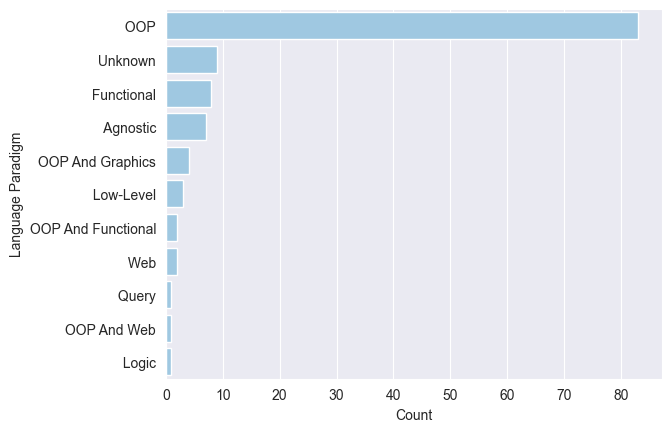

In [134]:
ax_lang = sns.barplot(families, y='language_family', x='number', color=blue)
ax_lang.set(xlabel = 'Count', ylabel = 'Language Paradigm')
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

## Evaluation

In [135]:
evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation.evaluation = evaluation.evaluation.str.replace('_', ' ').str.title()
evaluation

,evaluation,number,proportion
0,Student Survey,38,23.899371
1,Manual Grading,22,13.836478
2,Analytics,20,12.578616
3,Auto Grading,15,9.433962
4,With Without,11,6.918239
5,None,11,6.918239
6,User Study,6,3.773585
7,Grading Accuracy,6,3.773585
8,Teacher Survey,6,3.773585
9,Compared To Other Tools,5,3.144654


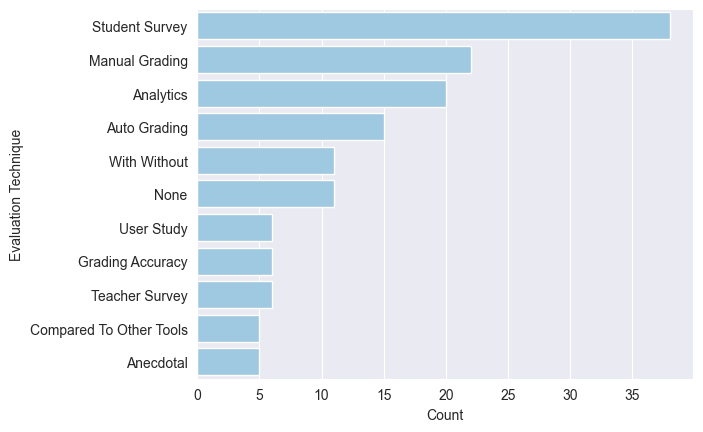

In [136]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='number', color=blue)
ax_eval.set(xlabel = 'Count', ylabel='Evaluation Technique')
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

## Data Availiablity

In [137]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability.data_available = data_availability.data_available.str.replace('on_request', 'On Request')
data_availability.data_available = data_availability.data_available.str.replace('False', 'Private')
data_availability.data_available = data_availability.data_available.str.replace('True', 'Public')
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

,data_available,number,proportion
0,Private,102,84.297521
1,Public,10,8.264463
2,On Request,9,7.438017


In [138]:
data_availability.number.sum()

121

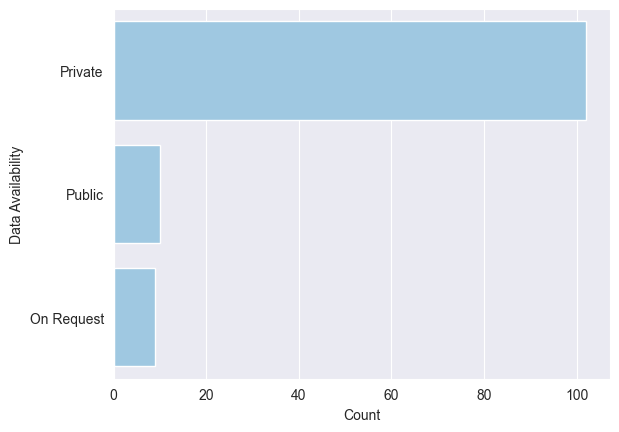

In [139]:
ax_da = sns.barplot(data_availability, y='data_available', x='number', color=blue)
ax_da.set(xlabel = 'Count', ylabel = 'Data Availability')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')

#### Compared to Human tagged papers

In [140]:
df[df.tags.astype(str).str.contains('manual_grading')]

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"['tool:javassess', 'language:java', 'interacti...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"['feedback:test_output', 'data:internal_assign...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Unknown]
5,rayyan-354359274,Evaluating Control-Flow Graph Similarity for G...,"Sendjaja K., Rukmono S.A., Perdana R.S.",Programming has become a fundamental skill in ...,2021,"['tool:none', 'data:internal_assignments', 'in...",[static],[correctness],[correctness_static],"[description, evaluation]",[Unknown]
8,rayyan-354359278,Combining dynamic and static analysis for auto...,"Wang J., Zhao Y., Tang Z., Xing Z.",Learning and teaching Structured Query Languag...,2020,"['tool:none', 'data:internal_assignments', 'in...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Query]
9,rayyan-354359279,Assisted learning of C programming through aut...,"Arifi S.M., Abbou R.B., Zahi A.",Programming courses are among all the current ...,2020,"['tool:claas', 'type:evaluation', 'language:C'...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
18,rayyan-354359294,Grading Programs Based on Hybrid Analysis,"Wang Z., Xu L.",Grading programming assignments often take a l...,2019,"['language:python', 'type:evaluation', 'data:l...","[dynamic, static]","[correctness, readability]","[correctness_dynamic, readability_static]","[description, evaluation]",[OOP]
21,rayyan-354359297,Automatic assessment of Java code,"Insa D., Silva J.",Assessment is an integral part of education of...,2018,"['skill:code_quality', 'feedback:test_output',...",[static],"[correctness, readability]","[correctness_static, readability_static]",[description],[OOP]
24,rayyan-354359300,Investigating the feasibility of automatic ass...,"Liebenberg J., Pieterse V.",Aim/Purpose The aims of this study were to inv...,2018,"['feedback:test_output', 'data:internal_assign...",[dynamic],[correctness],[correctness_dynamic],[experience],[OOP]
26,rayyan-354359302,Automatic Assessment via Intelligent Analysis ...,"Poon C.K., Wong T.-L., Tang C.M., Li J.K.L., Y...",Automatic assessment of computer programming e...,2018,"['language:c++', 'interaction:unknown', 'data:...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
34,rayyan-354359310,Automatic assessment of programming assignment...,"Muuli E., Papli K., Tõnisson E., Lepp M., Palt...",Automatic assessment of programming tasks in M...,2017,"['data:internal_assignments', 'tool:vpl', 'eva...",[ml],[correctness],[correctness_ml],"[description, evaluation]",[OOP]


In [141]:
list(df[df.key == 'rayyan-354359278'].tags)

["['tool:none', 'data:internal_assignments', 'interaction:unknown', 'language:sql', 'skill:correctness', 'data_available:True', 'technique:unit_testing', 'technique:dynamic_analysis', 'type:evaluation', 'technique:static_analysis', 'approach:fully_automated', 'type:description', 'evaluation:manual_grading', 'evaluation:grading_accuracy', 'technique:matching_rules', 'feedback:none']"]

In [142]:
human_df = pd.read_csv('data/compared_to_human.csv')
human_df.head()

,ID,Grading,Grading Eval Method,Grading Result Trend,Feedback,Feedback Eval Method,Feedback Result Trend,To discuss
0,354359270,Y,Comparision of Time,Positive,NaN,NaN,NaN,Y
1,354359272,Y,Grading Correlation,Positive,NaN,NaN,NaN,Y
2,354359274,Y,Tool Accuracy,Negative,NaN,NaN,NaN,NaN
3,354359278,Y,Tool Accuracy,Positive,NaN,NaN,NaN,Y
4,354359279,Y,Tool Accuracy,Positive,NaN,NaN,NaN,Y


#### Grading papers compared to human

In [143]:
grading_human = human_df[human_df.Grading == 'Y'].copy()
grading_human = grading_human.drop(columns=['Feedback', 'Feedback Eval Method', 'Feedback Result Trend', 'To discuss', 'Grading'])
grading_human = grading_human.groupby(['Grading Eval Method', 'Grading Result Trend']).count().reset_index()
grading_human.columns = ['eval_method', 'result_trend', 'count']
grading_human = grading_human.sort_values('count', ascending=False)
grading_human.head()

,eval_method,result_trend,count
5,Tool Accuracy,Positive,6
2,Grading Correlation,Positive,3
0,Comparision of Time,Positive,2
1,Grading Correlation,Mixed,2
4,Tool Accuracy,Negative,2


/Users/marcus/workspace/Programming/JavaDoc_Code_Similarity/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


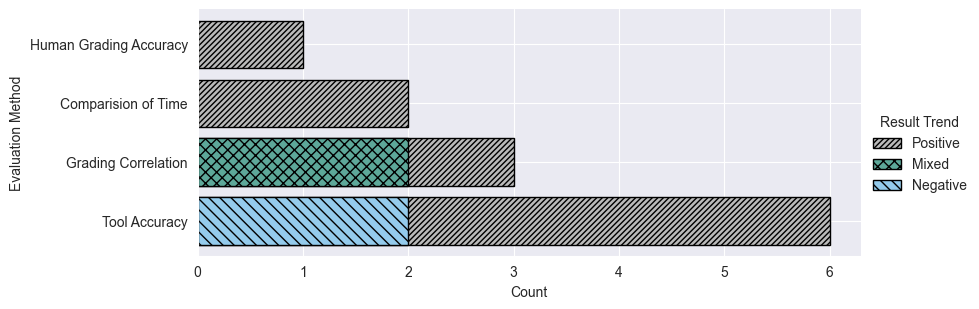

In [144]:
grading_human_cat = sns.FacetGrid(grading_human, hue='result_trend', aspect=3)
grading_human_cat.map_dataframe(plt.barh, y='eval_method', width='count')

grading_human_cat.set(xlabel='Count', ylabel='Evaluation Method')

hatches = ['//', 'x', '\\']
colors = [grey, teal, blue]
styles = zip(hatches, colors)

for style, these_bars in zip(styles, grading_human_cat.ax.containers):
    for this_bar in these_bars:
        this_bar.set_hatch(3 * style[0])
        this_bar.set_facecolor(style[1])
        this_bar.set_edgecolor('black')


grading_human_cat.add_legend(title='Result Trend')
plt.savefig('plots/grading_human_results.pdf')

In [145]:
feedback_human = human_df[human_df.Feedback == 'Y'].copy()
feedback_human = feedback_human.drop(columns=['Feedback', 'Grading Eval Method', 'Grading Result Trend', 'To discuss', 'Grading'])
feedback_human = feedback_human.groupby(['Feedback Eval Method', 'Feedback Result Trend']).count().reset_index()
feedback_human.columns = ['eval_method', 'result_trend', 'count']
feedback_human = feedback_human.sort_values('count', ascending=False)
feedback_human.head(10)

,eval_method,result_trend,count
0,Accuracy of Categorisation,Positive,1
1,Error Detection,Positive,1
2,Expert Agreement,Mixed,1
3,Expert Agreement,Positive,1
4,Grading Correlation,Mixed,1
5,Time to bug fix,Positive,1


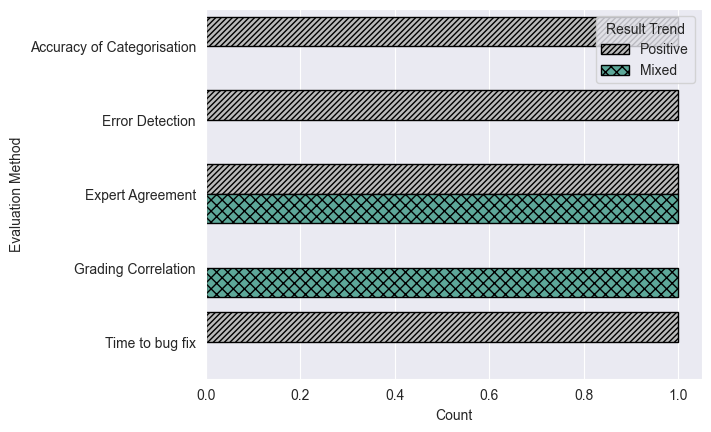

In [146]:
feedback_human_cat = sns.barplot(feedback_human, y='eval_method', x='count', hue='result_trend')

hatches = ['//', 'x', '\\']
colors = [grey, teal, blue]
styles = zip(hatches, colors)

for style, these_bars in zip(styles, feedback_human_cat.containers):
    for this_bar in these_bars:
        this_bar.set_hatch(3 * style[0])
        this_bar.set_facecolor(style[1])
        this_bar.set_edgecolor('black')


feedback_human_cat.legend(title='Result Trend')
feedback_human_cat.set(xlabel = 'Count', ylabel = 'Evaluation Method')
plt.savefig('plots/feedback_human_results.pdf', bbox_inches='tight')